## Importing Libraries

In [1]:
import pandas as pd
import h5py as hp
import numpy as np

C:\Users\neeha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Importing the h5 file and obtaning the Dataframes using keys 

In [2]:
file=hp.File('SVHN_single_grey1.h5',mode='r')

In [3]:
list(file.keys())


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

## Splitting the Data into Train, Validation and Test

In [4]:
X_test = file['X_test']
X_train = file['X_train']
X_val = file['X_val']
y_test = file['y_test']
y_train = file['y_train']
y_val = file['y_val']

## As the Data is as HDF5 Dataset converting it into a numpy array for Future Use

In [5]:
X_test

<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">

In [6]:
X_test_new=np.array(X_test).astype(np.float32)

In [7]:
X_test_new.shape

(18000, 32, 32)

In [8]:
X_train_new=np.array(X_train).astype(np.float32)
X_val_new=np.array(X_val).astype(np.float32)
y_test_new=np.array(y_test).astype(np.float32)
y_train_new=np.array(y_train).astype(np.float32)
y_val_new=np.array(y_val).astype(np.float32)


In [9]:
X_train_new.shape

(42000, 32, 32)

In [10]:
y_train_new.shape

(42000,)

## Checking of all the Data has data distributon for all classes

In [11]:
pd.Series(y_test_new).value_counts()

6.0    1832
1.0    1828
0.0    1814
4.0    1812
8.0    1812
7.0    1808
9.0    1804
2.0    1803
5.0    1768
3.0    1719
dtype: int64

In [12]:
pd.Series(y_train_new).value_counts()

3.0    4281
5.0    4232
2.0    4197
9.0    4196
7.0    4192
8.0    4188
4.0    4188
0.0    4186
1.0    4172
6.0    4168
dtype: int64

In [13]:
pd.Series(y_val_new).value_counts()

7.0    6000
6.0    6000
3.0    6000
5.0    6000
9.0    6000
8.0    6000
4.0    6000
2.0    6000
1.0    6000
0.0    6000
dtype: int64

## Converting all the available classes to Categorical

In [14]:
from keras.utils import np_utils

Using TensorFlow backend.


In [15]:
y_train = np_utils.to_categorical(y_train_new, 10)
y_test = np_utils.to_categorical(y_test_new, 10)
y_val = np_utils.to_categorical(y_val_new, 10)

In [16]:
y_train.shape

(42000, 10)

In [17]:
y_test.shape

(18000, 10)

In [18]:
y_val.shape

(60000, 10)

In [19]:
X_train_new.shape

(42000, 32, 32)

In [20]:
X_val_new.shape

(60000, 32, 32)

In [26]:
X_test_new.shape

(18000, 32, 32)

## Changing the Shape of the Features so can pass a 2 Dimentional vector for KNN

In [27]:
X_train = X_train_new.reshape(42000, 1024)    # 1024 = 32 X 32 the size of each image. There are 42000 images for training
X_test = X_test_new.reshape(18000, 1024)      # Images are flattended out into a vector of 1024 elements
X_val = X_val_new.reshape(60000, 1024)
X_train = X_train.astype('float32')      # Change the data type to float from integer (0 - 255)
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')


In [28]:
X_train /= 255 #Done for normalization of data, # Scale the data between 0 and 1
X_val /= 255
X_test /= 255


In [29]:
X_train.shape

(42000, 1024)

## Applying K Nearest Neighbours Model

In [126]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', 
                          metric = 'euclidean')
NNH

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [127]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

## Due to the Size of the data and the Data being more than 1 dimentional Grid Search CV was not able to compute an output so I have kept the code as commented below

In [222]:
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import GridSearchCV

k =np.arange(1,50,5)

knn = KNeighborsClassifier(algorithm = 'kd_tree')

parameters = {'n_neighbors' : k}

GS = GridSearchCV(knn, parameters, scoring = 'roc_auc', cv=10)


X_train = X_train_new.reshape(42000, 1024)

GS.fit(X_train, y_train)

GS.best_params_

best_score_

## Inorder to run the K Nearest Neighbours i had to reduce the size of the dataset to 5000 and compute the program

In [128]:
X_val_test=X_val[:5000]
y_val_test=y_val[:5000]

In [129]:
pd.Series(y_val_test[1]).value_counts()

0.0    9
1.0    1
dtype: int64

In [130]:
y_val_test.shape

(5000, 10)

In [131]:
y_pred_val=NNH.predict(X_val_test)

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val_test, y_pred_val)

0.4196

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_val_test, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.41      0.58      4000
           1       0.99      0.47      0.64      1000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.95      0.42      0.58      5000
   macro avg       0.20      0.09      0.12      5000
weighted avg       1.00      0.42      0.59      5000
 samples avg       0.42      0.42      0.42      5000



C:\Users\neeha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\neeha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


## Validation Test gives a 45% Accuracy

In [134]:
X_test_test=X_test[:5000]
y_test_test=y_test[:5000]
y_pred_test=NNH.predict(X_test_test)

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_test, y_pred_test)

0.2526

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.31      0.43       503
           1       0.76      0.38      0.50       503
           2       0.81      0.27      0.40       487
           3       0.70      0.14      0.23       461
           4       0.88      0.36      0.51       512
           5       0.74      0.16      0.26       522
           6       0.64      0.15      0.25       516
           7       0.86      0.42      0.57       476
           8       0.59      0.14      0.22       521
           9       0.77      0.21      0.33       499

   micro avg       0.77      0.25      0.38      5000
   macro avg       0.75      0.25      0.37      5000
weighted avg       0.75      0.25      0.37      5000
 samples avg       0.25      0.25      0.25      5000



C:\Users\neeha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


## Validation Test gives a 25% Accuracy

# Using K Nearest Neighbours i was only able to get 25% accuracy

# Now Lets Use Deep Learning to Build this Model and check the difference in the Accuracy

In [30]:
X_test.shape

(18000, 1024)

In [31]:
X_val.shape

(60000, 1024)

In [32]:
X_train=X_train.reshape(42000, 32, 32,1)

In [33]:
X_test=X_test.reshape(18000,32, 32,1)

In [34]:
X_val=X_val.reshape(60000,32, 32,1)

In [35]:
import keras
from keras.models import Sequential # Sequential(flow from layer 1-->n) and Functional model(used when we want to use someone elses model)
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape #(dense--fully connected), (flatten-- convert matrix to vector)
TRAIN = False
BATCH_SIZE = 32 #how many numbers in a batch so 60000/32 = total number of batches
EPOCHS = 10

## ● Implementing a deep neural network classifier including (feedforward neural network, RELU activations, Batch Normalization and flattening to convert it into a Vector)

In [36]:
# Define Model
from keras.layers.normalization import BatchNormalization

model = Sequential()

# Step 1 - Flattening for converting into a Vector
model.add(Flatten())

model.add(BatchNormalization())

model.add(Dense(units = 200, activation = 'relu'))    
    


# ● Implementing cost/loss function with  SGD , cross entropy loss


In [40]:
    # Prediction Layer
    model.add(Dense(10, kernel_initializer='uniform'))

  
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

   
    

In [38]:
import matplotlib.pyplot as plt

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 115us/step - loss: 1.8740 - acc: 0.3942 - val_loss: 1.3737 - val_acc: 0.6166
Epoch 2/10
42000/42000 [==============================] - 5s 108us/step - loss: 1.2558 - acc: 0.6275 - val_loss: 1.0443 - val_acc: 0.6967
Epoch 3/10
42000/42000 [==============================] - 4s 104us/step - loss: 1.0523 - acc: 0.6847 - val_loss: 0.8844 - val_acc: 0.7476
Epoch 4/10
42000/42000 [==============================] - 4s 95us/step - loss: 0.9427 - acc: 0.7155 - val_loss: 0.8146 - val_acc: 0.7627
Epoch 5/10
42000/42000 [==============================] - 4s 95us/step - loss: 0.8644 - acc: 0.7390 - val_loss: 0.7461 - val_acc: 0.7828
Epoch 6/10
42000/42000 [==============================] - 4s 97us/step - loss: 0.8047 - acc: 0.7578 - val_loss: 0.6791 - val_acc: 0.8017
Epoch 7/10
42000/42000 [==============================] - 4s 98us/step - loss

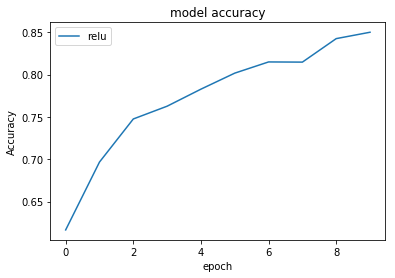

In [39]:
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(X_train, y_train))
    
loss, accuracy  = model.evaluate(X_train, y_train, verbose=False)
print()
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')
    
plt.plot(history.history['val_acc'])

    
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['relu'], loc='upper left')

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 132us/step - loss: 1.6301 - acc: 0.8616 - val_loss: 1.5912 - val_acc: 0.8993
Epoch 2/10
60000/60000 [==============================] - 7s 120us/step - loss: 1.6267 - acc: 0.8637 - val_loss: 1.5900 - val_acc: 0.8985
Epoch 3/10
60000/60000 [==============================] - 7s 124us/step - loss: 1.6265 - acc: 0.8627 - val_loss: 1.5879 - val_acc: 0.9002
Epoch 4/10
60000/60000 [==============================] - 7s 122us/step - loss: 1.6241 - acc: 0.8625 - val_loss: 1.5845 - val_acc: 0.9021
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 1.6228 - acc: 0.8643 - val_loss: 1.5840 - val_acc: 0.9021
Epoch 6/10
60000/60000 [==============================] - 8s 126us/step - loss: 1.6205 - acc: 0.8654 - val_loss: 1.5817 - val_acc: 0.9029
Epoch 7/10
60000/60000 [==============================] - 9s 148us/step - loss: 1.6189 - acc: 0.8669 - val_loss: 1.5803 - 

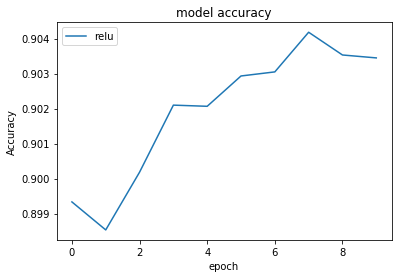

In [197]:
history = model.fit(X_val, y_val,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(X_val, y_val))
    
loss, accuracy  = model.evaluate(X_val, y_val, verbose=False)
print()
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')
    
plt.plot(history.history['val_acc'])

    
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['relu'], loc='upper left')


Test loss: 0.391
Test accuracy: 0.889


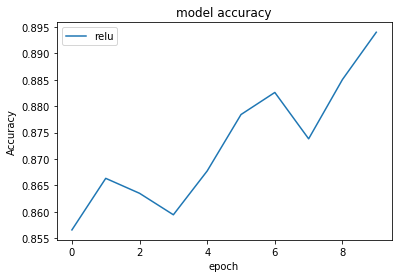

In [193]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
print()
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')
    
plt.plot(history.history['val_acc'])

    
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['relu'], loc='upper left')

In [215]:
y_pred_class=model.predict_classes(x=X_test)

In [216]:
y_test.argmax(axis=1)

array([1, 7, 2, ..., 7, 9, 2], dtype=int64)

In [217]:
y_test_val=y_test.argmax(axis=1)

In [218]:
y_pred_class

array([0, 7, 2, ..., 7, 9, 2], dtype=int64)

In [219]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.accuracy_score(y_test_val,y_pred_class))

0.8957777777777778


In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test_val,y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1814
           1       0.86      0.91      0.88      1828
           2       0.91      0.91      0.91      1803
           3       0.88      0.85      0.86      1719
           4       0.92      0.91      0.92      1812
           5       0.89      0.89      0.89      1768
           6       0.90      0.88      0.89      1832
           7       0.92      0.92      0.92      1808
           8       0.91      0.86      0.88      1812
           9       0.90      0.88      0.89      1804

   micro avg       0.90      0.90      0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



# Using Deep Learning Techniques we are able to obtain approximately 90% accuracy 

# where as using Just K-Nearest Neighbours the time required for each computation is higher 

# Best Value for K could not be found due to computational restrictions and so i was only able to achieve an accuracy Score of 25%